In [1]:
import numpy as np
import os
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
import requests

class Kuzushijidataset():
    
    resources = [
    ("http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-imgs.npz"),
    ("http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-labels.npz"),
    ("http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-imgs.npz"),
    ("http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-labels.npz")]
    
    training_file_imgs = "k49-train-imgs.npz"
    training_file_labels = "k49-train-labels.npz"
    test_file_imgs = "k49-test-imgs.npz"
    test_file_labels = "k49-test-labels.npz"
    data_dir = "data"
    
   
    def __init__(self, data_dir="data", train=True, transform=None, download=True):
        self.data_dir = data_dir
        
        if download:
            self.download(train)
            
        train_data_imgs = os.path.join(self.data_dir, self.training_file_imgs)
        train_data_imgs = np.load(train_data_imgs)
        train_data_imgs = train_data_imgs.f.arr_0

        train_data_labels = os.path.join(self.data_dir, self.training_file_labels)
        train_data_labels = np.load(train_data_labels)
        train_data_labels = train_data_labels.f.arr_0

        test_data_imgs = os.path.join(self.data_dir, self.test_file_imgs)
        test_data_imgs = np.load(test_data_imgs)
        test_data_imgs = test_data_imgs.f.arr_0
        
        test_data_labels = os.path.join(self.data_dir, self.test_file_labels)
        test_data_labels = np.load(test_data_labels)
        test_data_labels = test_data_labels.f.arr_0
        
        self.transform = transform
        
        if train:
            self.data = train_data_imgs
            self.targets = train_data_labels
        else:
            self.data = test_data_imgs
            self.targets = test_data_labels


    def __len__(self):
        return(len(self.data))
    
    def __getitem__(self, idx):
        img, target = self.data[idx], int(self.targets[idx])

        # doing this so that it is consistent with all other datasets
        # to return a PIL Image
        img = Image.fromarray(img, mode='L') # mode='L' - (8-bit pixels, black and white)

        if self.transform:
            img = self.transform(img)
        
        return img, target        
      
    def download(self, train):
        # download the Kuzushiji-49 dataset if it doesn't exist
        if self._check_exists():
            if train:
                print('Train dataset already exists!')
            else:
                print('Test dataset already exists!')
            return

        if not os.path.exists(self.data_dir):
            os.makedirs(self.data_dir)
            
        for url in self.resources:
            filename = url.rpartition('/')[2]
            print('Downloading: ', filename)
            myfile = requests.get(url, allow_redirects=True)
            open(os.path.join(self.data_dir, filename), 'wb').write(myfile.content)

        print('All files downloaded!')
        

    def _check_exists(self):
        return (os.path.exists(os.path.join(self.data_dir, self.training_file_imgs)) and
                os.path.exists(os.path.join(self.data_dir, self.training_file_labels)) and
                os.path.exists(os.path.join(self.data_dir, self.test_file_imgs)) and
                os.path.exists(os.path.join(self.data_dir, self.test_file_labels)))


In [3]:
classes = ['あ - a', 'い - i', 'う - u', 'え - e', 'お - o', 
       'か - ka', 'き - ki', 'く - ku', 'け - ke', 'こ - ko', 
       'さ - sa', 'し - shi', 'す - su', 'せ - se', 'そ - so', 
       'た - ta', 'ち - chi', 'つ - tsu', 'て - te', 'と - to', 
       'な - na', 'に - ni', 'ぬ - nu', 'ね - ne', 'の - no',
       'は - ha', 'ひ - hi', 'ふ - fu', 'へ - he', 'ほ - ho',
       'ま - ma', 'み - mi', 'む - mu', 'め - me', 'も - mo',
       'や - ya', 'ゆ - yu', 'よ - yo', 
       'ら - ra', 'り - ri', 'る - ru', 'れ - re', 'ろ - ro',
       'わ - wa', 'ゐ - wi', 'ゑ - we', 'を - wo', 'ん - n', 'ゝ']

In [4]:
# Load train and test datasets
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))
    ])


train_data = Kuzushijidataset("data", train=True, download=True, transform=transforms.ToTensor())

test_data = Kuzushijidataset("data", train=False, download=True, transform=transforms.ToTensor())


print("Train dataset size: ", len(train_data))
print("Test dataset size: ", len(test_data))

Train dataset already exists!
Test dataset already exists!
Train dataset size:  232365
Test dataset size:  38547


In [5]:
# Split the training dataset into training and validation
train_data, val_data = torch.utils.data.random_split(train_data, [210000, 22365])    # split into 200k training & ~32k validation (roughly the size of the test dataset)

In [6]:
batch_size = 128

# create training data loader
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True) 


# create validation data loader
val_loader = torch.utils.data.DataLoader(dataset=val_data, batch_size=batch_size, shuffle=True)

# create test data loader
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)


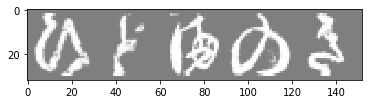

ひ - hi | と - to | ま - ma | の - no | き - ki |


In [7]:
import matplotlib.pyplot as plt
import numpy as np

qtd_images = 5

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:qtd_images], nrow = qtd_images, scale_each=False))
# print labels
print(' '.join('%5s |' % classes[labels[j]] for j in range(qtd_images)))

In [8]:
# define the model

import torch.nn.functional as F

class ConvNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
            # torch.nn.conv2d(in_channels, out_channels, kernel_size)
            # in_channels is the number of layers which it takes in (i.e.num color channels in 1st layer)
            # out_channels is the number of different filters that we use
            # kernel_size is the depthxwidthxheight of the kernel#
            # stride is how many pixels we shift the kernel by each time
        self.conv_layers = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1), # -4
            torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels=32, out_channels= 64, kernel_size=5, stride=1),#
            torch.nn.ReLU()
        )
        self.fc_layers = torch.nn.Sequential(
            torch.nn.Linear(64 * 20 * 20, 120),
            torch.nn.Linear(120, 49)
        )
        
        # Spatial transformer localization-network
        self.localization = torch.torch.nn.Sequential(
            torch.nn.Conv2d(1, 8, kernel_size=7),
            torch.nn.MaxPool2d(2, stride=2),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(8, 10, kernel_size=5),
            torch.nn.MaxPool2d(2, stride=2),
            torch.nn.ReLU(True)
        )

        # Regressor for the 3 * 2 affine matrix
        self.fc_loc = torch.nn.Sequential(
            torch.nn.Linear(10 * 3 * 3, 32),
            torch.nn.ReLU(True),
            torch.nn.Linear(32, 3 * 2)
        )

        # Initialize the weights/bias with identity transformation
        self.fc_loc[2].weight.data.zero_()
        self.fc_loc[2].bias.data.copy_(torch.tensor([1, 0, 0, 0, 1, 0], dtype=torch.float))

        
    def stn(self, x):
        xs = self.localization(x)
        xs = xs.view(-1, 10 * 3 * 3)
        theta = self.fc_loc(xs)
        theta = theta.view(-1, 2, 3)

        grid = F.affine_grid(theta, x.size())
        x = F.grid_sample(x, grid)

        return x
    
    def forward(self, x):
        x = self.stn(x)
        x = self.conv_layers(x)
        x = x.view(x.shape[0], -1)
        x = self.fc_layers(x)
        X = F.softmax(x, dim=1)
        return x


In [9]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(use_cuda)

True


In [10]:
CNN = ConvNet().to(device)

criterion = torch.nn.CrossEntropyLoss()

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter() # we will use this to show our models performance on a graph

In [11]:
def train(model, epochs, optimiser='Adam', learning_rate = 0.0001, verbose=False, tag='Loss/Train'):
    if(optimiser=='Adam'):
        optimiser = torch.optim.Adam(model.parameters(), lr= learning_rate)
    else:
        optimiser = torch.optim.SGD(model.parameters(), lr= learning_rate)
        
    cost = []
    model.train()                                  # put the model into training mode (more on this later)
    for epoch in range(epochs):
        for idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            prediction = model(inputs) # pass the data forward through the model
            loss = criterion(prediction, labels) # compute the loss
            optimiser.zero_grad() # reset the gradients attribute of each of the model's params to zero
            loss.backward() # backward pass to compute and set all of the model param's gradients
            optimiser.step() # update the model's parameters
            cost.append(loss)
            writer.add_scalar(tag, loss, epoch*len(train_loader) + idx)    # write loss to a graph
        if verbose: print('Epoch:', epoch, '\tAccuracy:', calc_accuracy(model, val_loader), '\tLoss:', loss)
    return cost

In [12]:
import numpy as np
            
def calc_accuracy(model, dataloader, testset=False):
    with torch.no_grad():
        misclass_i = []
        misclass_l = []
        num_correct = 0
        num_examples = len(dataloader.dataset)                       # test DATA not test LOADER
        for inputs, labels in dataloader:                  # for all exampls, over all mini-batches in the test dataset
            inputs, labels = inputs.to(device), labels.to(device)
            predictions = model(inputs)
            predictions = torch.max(predictions, axis=1)    # reduce to find max indices along direction which column varies
            predictions = predictions[1]                    # torch.max returns (values, indices)
            num_correct += int(sum(predictions == labels))

            if testset: #generate a list of misclassified data
                if sum(predictions != labels):
                    for i in range(len(predictions)):
                        if(predictions[i] != labels[i]):
                            misclass_i.append(inputs[i])
                            misclass_l.append(labels[i])

        percent_correct = num_correct / num_examples * 100
        return percent_correct, misclass_i, misclass_l

In [13]:
model = CNN

cost = train(model, epochs=8, optimiser='Adam', learning_rate=0.0001, verbose=True)
print('Train Accuracy:', calc_accuracy(model, train_loader))
print('Test Accuracy:', calc_accuracy(model, test_loader))

/home/elisio/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2764: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
/home/elisio/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


Epoch: 0 	Accuracy: (88.40599150458306, [], []) 	Loss: tensor(0.3731, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch: 1 	Accuracy: (91.87569863626202, [], []) 	Loss: tensor(0.4399, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch: 2 	Accuracy: (93.57478202548624, [], []) 	Loss: tensor(0.2385, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch: 3 	Accuracy: (94.19628884417617, [], []) 	Loss: tensor(0.1161, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch: 4 	Accuracy: (94.81779566286609, [], []) 	Loss: tensor(0.0662, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch: 5 	Accuracy: (95.08160071540354, [], []) 	Loss: tensor(0.1086, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch: 6 	Accuracy: (94.73284149340488, [], []) 	Loss: tensor(0.0660, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch: 7 	Accuracy: (95.07712944332663, [], []) 	Loss: tensor(0.0936, device='cuda:0', grad_fn=<NllLossBackward>)
Train Accuracy: (97.68190476190476, [], [])
Test Accuracy: (90.85791371572365, [], [])


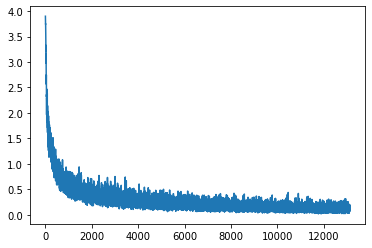

In [14]:
plt.figure()
plt.plot(cost)